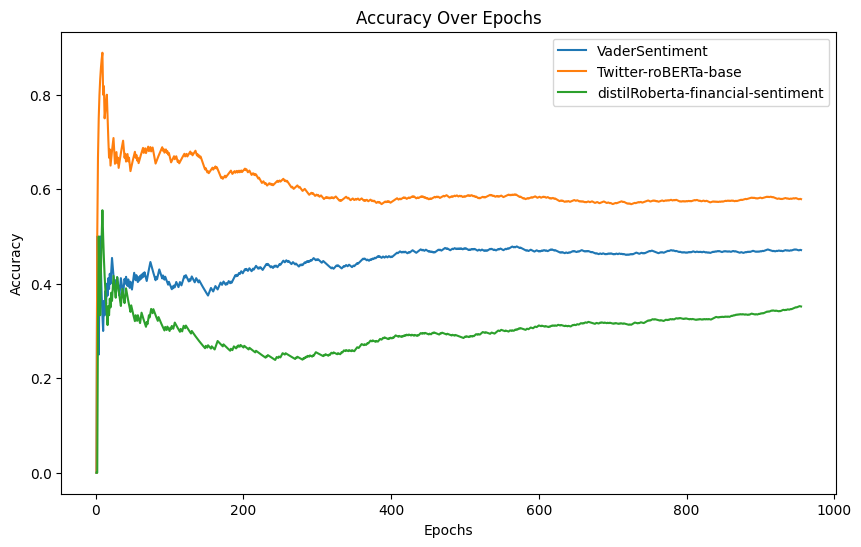

<Figure size 640x480 with 0 Axes>

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


# Load CSV file into a Pandas DataFrame
file_path = '/content/reddit-processed-output.csv'
df = pd.read_csv(file_path)

# Assuming your CSV file has columns like 'epoch', 'accuracy1', 'accuracy2', 'accuracy3'
# Replace these with the actual column names from your CSV file
epochs = [i for i in range(1,956)]

true_label = df['label']
s1 = df['s1']
s2 = df['s2']
s3 = df['s3']

def calc_accuracy(sent,true_label):
  accuracyList = []
  accuracyList.append(1) if sent[0] == true_label[0] else accuracyList.append(0)
  for i in range(1,len(sent)):
    accuracyList.append((accuracyList[-1]*i+1)/(i+1)) if sent[i] == true_label[i] else accuracyList.append((accuracyList[-1]*i)/(i+1))
  return accuracyList

a1 = calc_accuracy(s1,true_label)
a2 = calc_accuracy(s2,true_label)
a3 = calc_accuracy(s3,true_label)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, a1, label='VaderSentiment')
plt.plot(epochs, a2, label='Twitter-roBERTa-base')
plt.plot(epochs, a3, label='distilRoberta-financial-sentiment')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()  # Add legend to differentiate the lines

# Display the plot
plt.show()
plt.savefig('accuracy-plot.png')